In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-04T16:49:18.153983+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]
seaborn: 0.13.2
teeplot: 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Alpha+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.8596649169921875e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.47994208335876465}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003992557525634766}
!!! {"init_...": 0.0006115436553955078}
!!! {"ete3Tree": 0.6544415950775146}
!!! {"GenomeTree_hierarchical": 0.0028874874114990234}
!!! {"mutateBranchETEhierarchy": 0.09420657157897949}
!!! {"write_genome_short": 0.050656795501708984}


  4%|▎         | 7/193 [00:03<01:02,  2.99it/s]

!!! {"writeGenomeNoIndels": 0.17427659034729004}
!!! {"pl.DataFrame": 0.04483962059020996}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0315783023834229}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017192840576171875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0034856796264648438}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014281272888183594}
!!! {"init_...": 0.0005109310150146484}
!!! {"ete3Tree": 7.987022399902344e-05}
!!! {"GenomeTree_hierarchical": 0.0021975040435791016}
!!! {"mutateBranchETEhierarchy": 1.52587890625e-05}
!!! {"write_genome_short": 7.390975952148438e

 10%|█         | 20/193 [00:03<00:15, 11.30it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003983974456787109}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013136863708496094}
!!! {"init_...": 0.0004229545593261719}
!!! {"ete3Tree": 0.0008308887481689453}
!!! {"GenomeTree_hierarchical": 0.002759218215942383}
!!! {"mutateBranchETEhierarchy": 0.0001361370086669922}
!!! {"write_genome_short": 0.00013637542724609375}
!!! {"writeGenomeNoIndels": 0.00023984909057617188}
!!! {"pl.DataFrame": 0.00013184547424316406}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006423234939575195}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00021910667419433594}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as

 13%|█▎        | 26/193 [00:03<00:11, 14.95it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008766651153564453}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001475811004638672}
!!! {"init_...": 0.00046181678771972656}
!!! {"ete3Tree": 0.019522666931152344}
!!! {"GenomeTree_hierarchical": 0.0020432472229003906}
!!! {"mutateBranchETEhierarchy": 0.005057334899902344}
!!! {"write_genome_short": 0.0023589134216308594}
!!! {"writeGenomeNoIndels": 0.007891178131103516}
!!! {"pl.DataFrame": 0.0016245841979980469}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04105734825134277}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009577274322509766}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick

 20%|█▉        | 38/193 [00:03<00:06, 25.15it/s]

!!! {"phastSimRun": 0.00011324882507324219}
!!! {"init_...": 0.0005702972412109375}
!!! {"ete3Tree": 0.0004532337188720703}
!!! {"GenomeTree_hierarchical": 0.002099752426147461}
!!! {"mutateBranchETEhierarchy": 8.726119995117188e-05}
!!! {"write_genome_short": 0.00011086463928222656}
!!! {"writeGenomeNoIndels": 0.0001461505889892578}
!!! {"pl.DataFrame": 0.00013589859008789062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005814552307128906}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002505779266357422}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0031595230102539062}
enter log_context_duration for 

 23%|██▎       | 44/193 [00:03<00:05, 28.43it/s]

!!! {"phastSimRun": 0.0001494884490966797}
!!! {"init_...": 0.0006496906280517578}
!!! {"ete3Tree": 7.843971252441406e-05}
!!! {"GenomeTree_hierarchical": 0.002966165542602539}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 6.961822509765625e-05}
!!! {"writeGenomeNoIndels": 1.049041748046875e-05}
!!! {"pl.DataFrame": 9.489059448242188e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00629734992980957}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002219676971435547}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008796930313110352}
enter log_context_duration for _d

 30%|██▉       | 57/193 [00:04<00:03, 39.93it/s]

!!! {"phastSimRun": 0.00012826919555664062}
!!! {"init_...": 0.0006008148193359375}
!!! {"ete3Tree": 0.00017905235290527344}
!!! {"GenomeTree_hierarchical": 0.002201557159423828}
!!! {"mutateBranchETEhierarchy": 3.457069396972656e-05}
!!! {"write_genome_short": 0.00010085105895996094}
!!! {"writeGenomeNoIndels": 5.054473876953125e-05}
!!! {"pl.DataFrame": 9.655952453613281e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005515575408935547}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000225067138671875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003203153610229492}
enter log_context_duration for _d

 36%|███▋      | 70/193 [00:04<00:02, 48.84it/s]

!!! {"write_genome_short": 0.0006310939788818359}
!!! {"writeGenomeNoIndels": 2.4080276489257812e-05}
!!! {"pl.DataFrame": 9.131431579589844e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0054891109466552734}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002415180206298828}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=17, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003155231475830078}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001304149627685547}
!!! {"init_...": 0.00043964385986328125}
!!! {"ete3Tree": 0.0001628398895263672}
!!! {"GenomeTree_hierarchical": 0.0022840499877929688}
!!! {"mutateBranchETEhierarchy": 3.83853

 39%|███▉      | 76/193 [00:04<00:02, 50.52it/s]

!!! {"write_genome_short": 0.0006091594696044922}
!!! {"writeGenomeNoIndels": 8.559226989746094e-05}
!!! {"pl.DataFrame": 0.00010228157043457031}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0058476924896240234}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00023984909057617188}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=44, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003251314163208008}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000118255615234375}
!!! {"init_...": 0.00043272972106933594}
!!! {"ete3Tree": 0.0003476142883300781}
!!! {"GenomeTree_hierarchical": 0.002237558364868164}
!!! {"mutateBranchETEhierarchy": 6.8426

 46%|████▌     | 89/193 [00:04<00:02, 45.14it/s]

!!! {"write_genome_short": 0.003086090087890625}
!!! {"writeGenomeNoIndels": 0.00864863395690918}
!!! {"pl.DataFrame": 0.0016543865203857422}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.043418169021606445}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009565353393554688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3416, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008138418197631836}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001399517059326172}
!!! {"init_...": 0.00048804283142089844}
!!! {"ete3Tree": 0.01956939697265625}
!!! {"GenomeTree_hierarchical": 0.002233266830444336}
!!! {"mutateBranchETEhierarchy": 0.004987239

 49%|████▉     | 95/193 [00:04<00:02, 42.27it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.011894941329956055}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00018262863159179688}
!!! {"init_...": 0.0005822181701660156}
!!! {"ete3Tree": 0.027698993682861328}
!!! {"GenomeTree_hierarchical": 0.0026235580444335938}
!!! {"mutateBranchETEhierarchy": 0.005759239196777344}
!!! {"write_genome_short": 0.002987384796142578}
!!! {"writeGenomeNoIndels": 0.010410547256469727}
!!! {"pl.DataFrame": 0.0020797252655029297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.054550886154174805}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.001157999038696289}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newic

 55%|█████▍    | 106/193 [00:05<00:01, 45.52it/s]

!!! {"phastSimRun": 0.0001373291015625}
!!! {"init_...": 0.0006134510040283203}
!!! {"ete3Tree": 0.00783538818359375}
!!! {"GenomeTree_hierarchical": 0.001986980438232422}
!!! {"mutateBranchETEhierarchy": 0.0017223358154296875}
!!! {"write_genome_short": 0.0009219646453857422}
!!! {"writeGenomeNoIndels": 0.002844572067260742}
!!! {"pl.DataFrame": 0.0006418228149414062}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.019320011138916016}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005793571472167969}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=1839, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.006018638610839844}
enter log_context_duration for _do_run

 61%|██████    | 118/193 [00:05<00:01, 49.56it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=624, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.004270076751708984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011157989501953125}
!!! {"init_...": 0.00041961669921875}
!!! {"ete3Tree": 0.004391908645629883}
!!! {"GenomeTree_hierarchical": 0.002034425735473633}
!!! {"mutateBranchETEhierarchy": 0.0007941722869873047}
!!! {"write_genome_short": 0.0004715919494628906}
!!! {"writeGenomeNoIndels": 0.0015091896057128906}
!!! {"pl.DataFrame": 0.0003879070281982422}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.011686563491821289}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00042843

 64%|██████▍   | 124/193 [00:05<00:01, 49.63it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003551959991455078}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015544891357421875}
!!! {"init_...": 0.0004477500915527344}
!!! {"ete3Tree": 7.605552673339844e-05}
!!! {"GenomeTree_hierarchical": 0.0022275447845458984}
!!! {"mutateBranchETEhierarchy": 1.5020370483398438e-05}
!!! {"write_genome_short": 8.654594421386719e-05}
!!! {"writeGenomeNoIndels": 9.775161743164062e-06}
!!! {"pl.DataFrame": 9.679794311523438e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0053861141204833984}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002396106719970703}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=615, len(ancestral_sequence)=390
enter log_context_duration for alifestd_a

 72%|███████▏  | 138/193 [00:05<00:00, 55.01it/s]

!!! {"phastSimRun": 0.00012040138244628906}
!!! {"init_...": 0.0005717277526855469}
!!! {"ete3Tree": 6.771087646484375e-05}
!!! {"GenomeTree_hierarchical": 0.0030384063720703125}
!!! {"mutateBranchETEhierarchy": 1.2636184692382812e-05}
!!! {"write_genome_short": 9.274482727050781e-05}
!!! {"writeGenomeNoIndels": 6.9141387939453125e-06}
!!! {"pl.DataFrame": 0.00010323524475097656}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006686687469482422}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020551681518554688}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0030798912048339844}
enter log_context_duration f

 75%|███████▍  | 144/193 [00:05<00:00, 56.14it/s]

!!! {"write_genome_short": 0.0004391670227050781}
!!! {"writeGenomeNoIndels": 1.430511474609375e-05}
!!! {"pl.DataFrame": 9.989738464355469e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.006524324417114258}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002777576446533203}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003148794174194336}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00013589859008789062}
!!! {"init_...": 0.0004341602325439453}
!!! {"ete3Tree": 6.723403930664062e-05}
!!! {"GenomeTree_hierarchical": 0.0021431446075439453}
!!! {"mutateBranchETEhierarchy": 1.16825103

 80%|████████  | 155/193 [00:06<00:00, 42.57it/s]

!!! {"pl.DataFrame": 0.0022020339965820312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0500798225402832}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0014197826385498047}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033218860626220703}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00016188621520996094}
!!! {"init_...": 0.0004754066467285156}
!!! {"ete3Tree": 7.987022399902344e-05}
!!! {"GenomeTree_hierarchical": 0.0022232532501220703}
!!! {"mutateBranchETEhierarchy": 1.52587890625e-05}
!!! {"write_genome_short": 8.58306884765625e-05}
!!! {"writeGenomeNoIndels": 7.390975952148

 83%|████████▎ | 160/193 [00:07<00:03, 10.68it/s]

!!! {"mutateBranchETEhierarchy": 0.04606986045837402}
!!! {"write_genome_short": 0.024306535720825195}
!!! {"writeGenomeNoIndels": 0.07547640800476074}
!!! {"pl.DataFrame": 0.012802600860595703}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3320629596710205}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.005984067916870117}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003192901611328125}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014090538024902344}
!!! {"init_...": 0.00046181678771972656}
!!! {"ete3Tree": 8.487701416015625e-05}
!!! {"GenomeTree_hierarchical": 0.0022521018981933

 85%|████████▌ | 165/193 [00:07<00:02, 13.51it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=1503, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.005620241165161133}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001220703125}
!!! {"init_...": 0.0004296302795410156}
!!! {"ete3Tree": 0.00917506217956543}
!!! {"GenomeTree_hierarchical": 0.0020363330841064453}
!!! {"mutateBranchETEhierarchy": 0.0020360946655273438}
!!! {"write_genome_short": 0.0011601448059082031}
!!! {"writeGenomeNoIndels": 0.003550291061401367}
!!! {"pl.DataFrame": 0.0007290840148925781}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.020881175994873047}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005531311035

 92%|█████████▏| 178/193 [00:08<00:00, 20.89it/s]

!!! {"ete3Tree": 0.0626828670501709}
!!! {"GenomeTree_hierarchical": 0.0020689964294433594}
!!! {"mutateBranchETEhierarchy": 0.015616893768310547}
!!! {"write_genome_short": 0.007779359817504883}
!!! {"writeGenomeNoIndels": 0.025632143020629883}
!!! {"pl.DataFrame": 0.004683971405029297}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12126564979553223}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.002385854721069336}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7642974853515625e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032165050506591797}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014328956604003906}
!!! {"init_...": 0.00046515464782

 95%|█████████▍| 183/193 [00:08<00:00, 24.36it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.006744861602783203}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012230873107910156}
!!! {"init_...": 0.00046753883361816406}
!!! {"ete3Tree": 0.008854866027832031}
!!! {"GenomeTree_hierarchical": 0.002775907516479492}
!!! {"mutateBranchETEhierarchy": 0.0022051334381103516}
!!! {"write_genome_short": 0.001264810562133789}
!!! {"writeGenomeNoIndels": 0.003652811050415039}
!!! {"pl.DataFrame": 0.0007534027099609375}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.021832942962646484}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006403923034667969}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.71661376953125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newic

100%|██████████| 193/193 [00:08<00:00, 22.71it/s]

!!! {"writeGenomeNoIndels": 0.012114286422729492}
!!! {"pl.DataFrame": 0.0022172927856445312}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05965137481689453}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0016307830810546875}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003185272216796875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001437664031982422}
!!! {"init_...": 0.000484466552734375}
!!! {"ete3Tree": 7.557868957519531e-05}
!!! {"GenomeTree_hierarchical": 0.002215147018432617}
!!! {"mutateBranchETEhierarchy": 1.52587890625e-05}
!!! {"write_genome_short": 7.152557373046875

exit log_context_duration for extract variant
!!! {"extract variant": 0.09592700004577637}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2671513557434082}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.04095053672790527}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0026526451110839844}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.86102294921875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03328967094421387}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0021800994873046875}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0028755664825439453}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033226966857910156}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.002742290496826172}
enter log_context_duration for seq

 43%|████▎     | 3/7 [00:00<00:00, 22.57it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.0340578556060791}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0036215782165527344}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.003007650375366211}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.0994415283203125e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03334164619445801}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003532886505126953}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0028014183044433594}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismat

100%|██████████| 7/7 [00:00<00:00, 23.56it/s]

exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0034554004669189453}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 3.5762786865234375e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.03391551971435547}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003665924072265625}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0014355182647705078}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.020956754684448242}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.00296783447265625}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diff

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.25265026092529297}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 35
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 36
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:26<00:00, 157.15it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 29.47534728050232}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 602.37it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 143.15956211090088}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.0671987533569336}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 205.98963952064514}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009511709213256836}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.00040984153747558594}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0004165172576904297}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.00043320655822753906}
ancestral


100%|██████████| 368/368 [00:00<00:00, 179414.61it/s]

process mutations:   0%|          | 1/368 [00:00<01:23,  4.40it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:15<12:16,  2.05s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   17.3s



process mutations:  13%|█▎        | 48/368 [00:56<06:03,  1.14s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   57.4s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.1min



process mutations:  24%|██▍       | 88/368 [01:38<05:04,  1.09s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  1.8min



process mutations:  35%|███▍      | 128/368 [02:21<04:20,  1.09s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  2.5min



process mutations:  46%|████▌     | 168/368 [03:03<03:34,  1.07s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  3.2min



process mutations:  57%|█████▋    | 208/368 [03:46<02:50,  1.07s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.0min



process mutations:  67%|██████▋   | 248/368 [04:30<02:09,  1.08s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  4.7min



process mutations:  78%|███████▊  | 288/368 [05:12<01:25,  1.07s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  5.5min



process mutations:  89%|████████▉ | 328/368 [05:55<00:42,  1.07s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  6.2min



process mutations: 100%|██████████| 368/368 [06:41<00:00,  1.09s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  6.7min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  6.8min finished


process replicate: 100%|██████████| 1/1 [10:23<00:00, 623.03s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.08233332633972168}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 110
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> '68e8ecaf-bffa-8599-aa87-e21d11fbdf56', '68e8ecaf-bffa-8599-aa87-e21d11fbdf56', '68e8ecaf-bffa-8599-aa87-e21d11
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


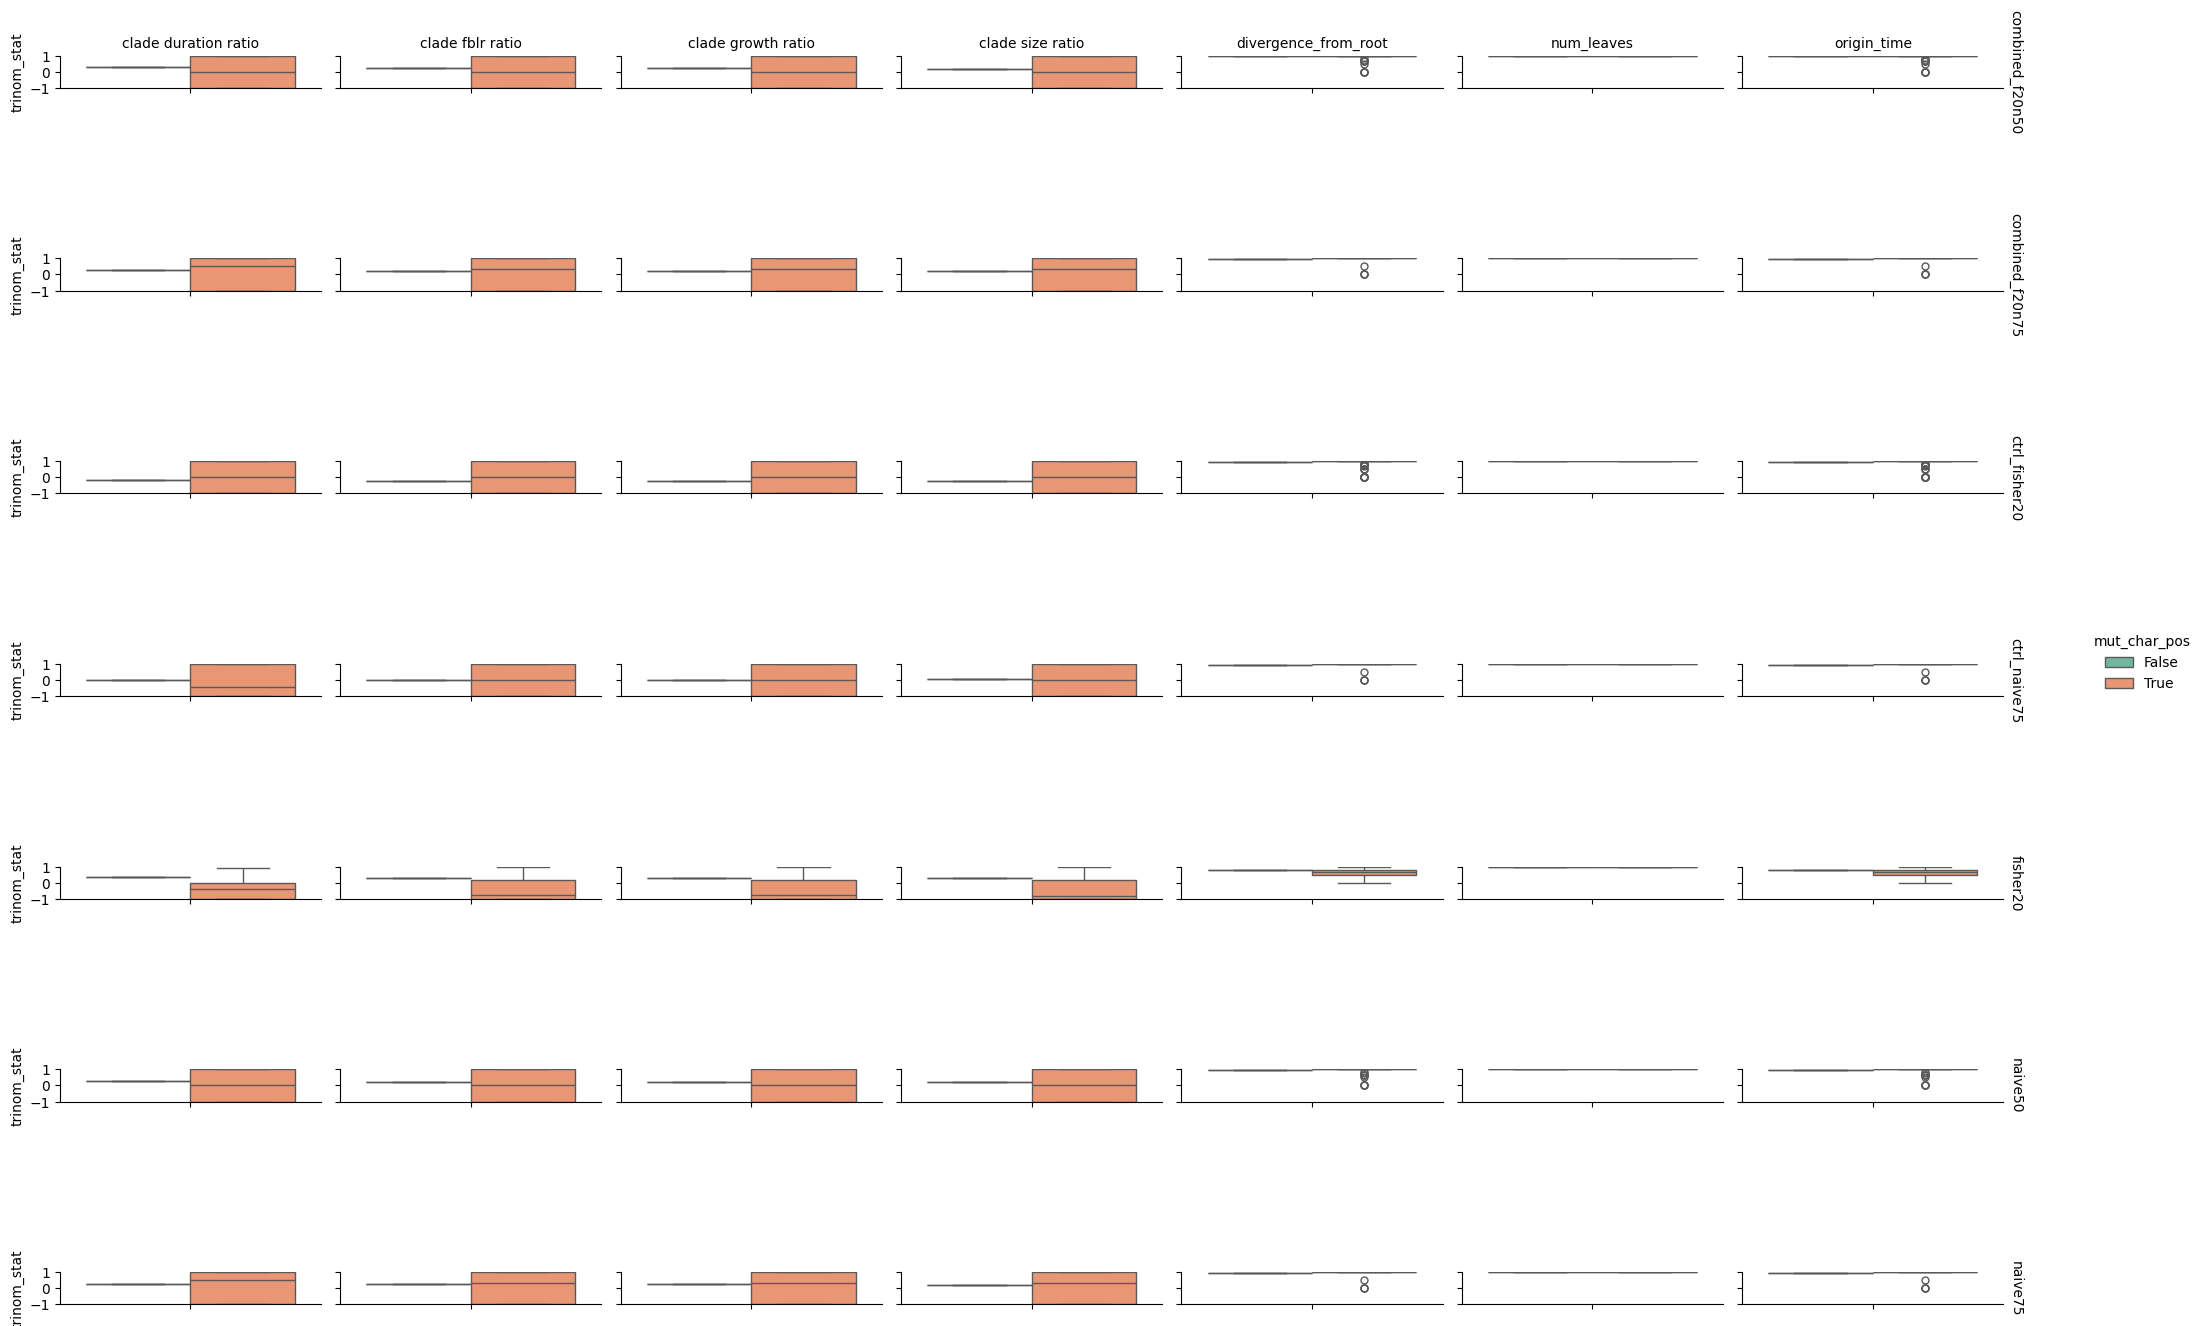

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


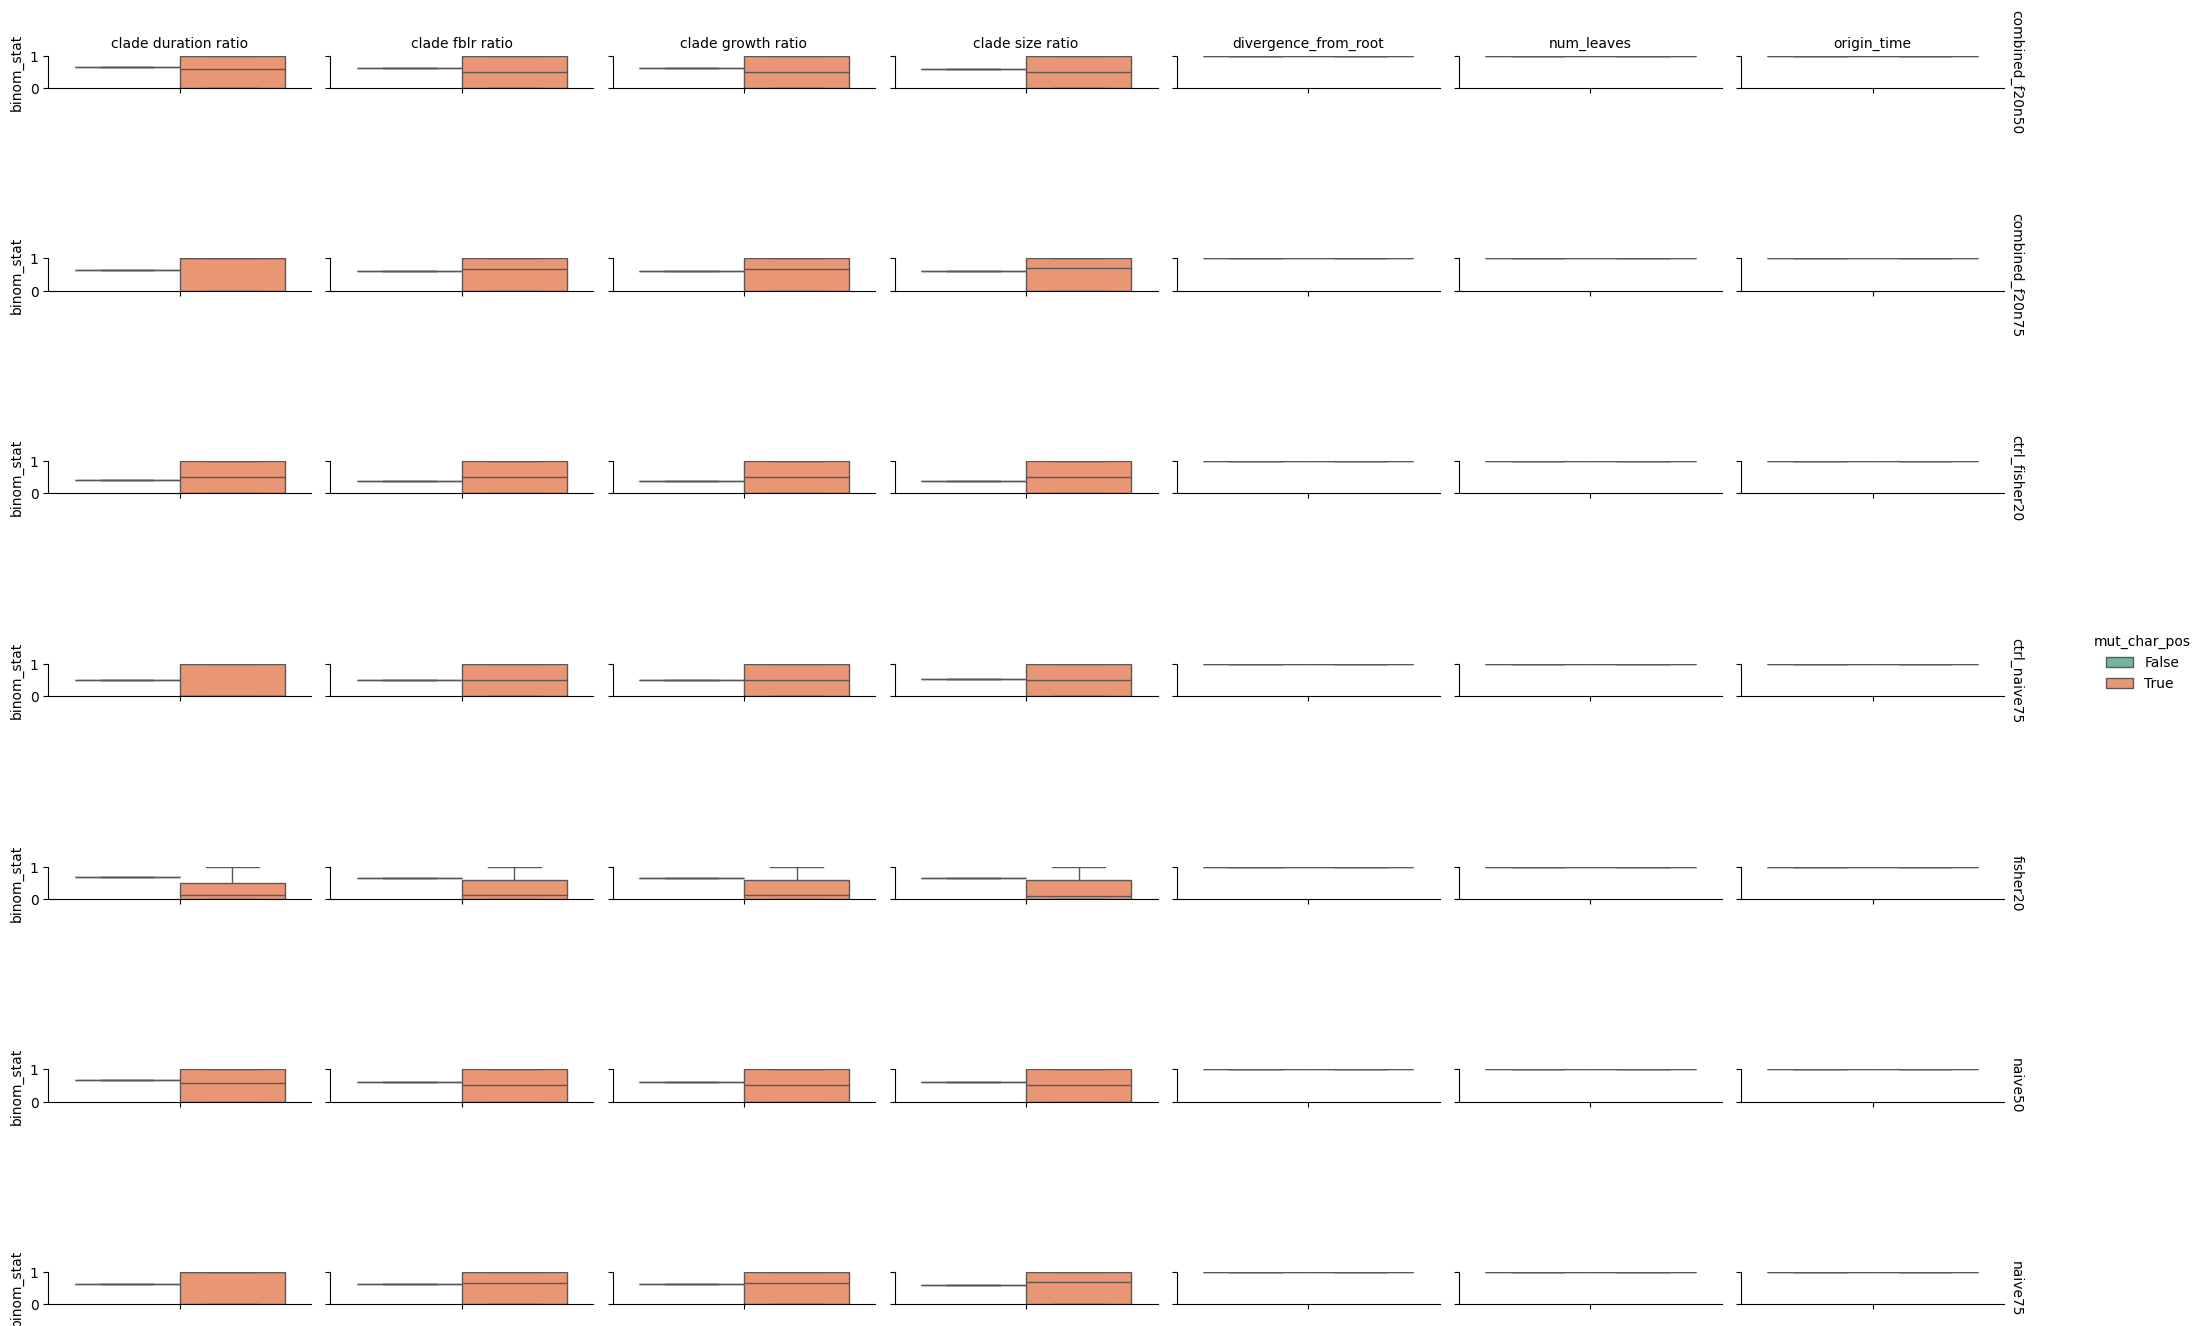

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


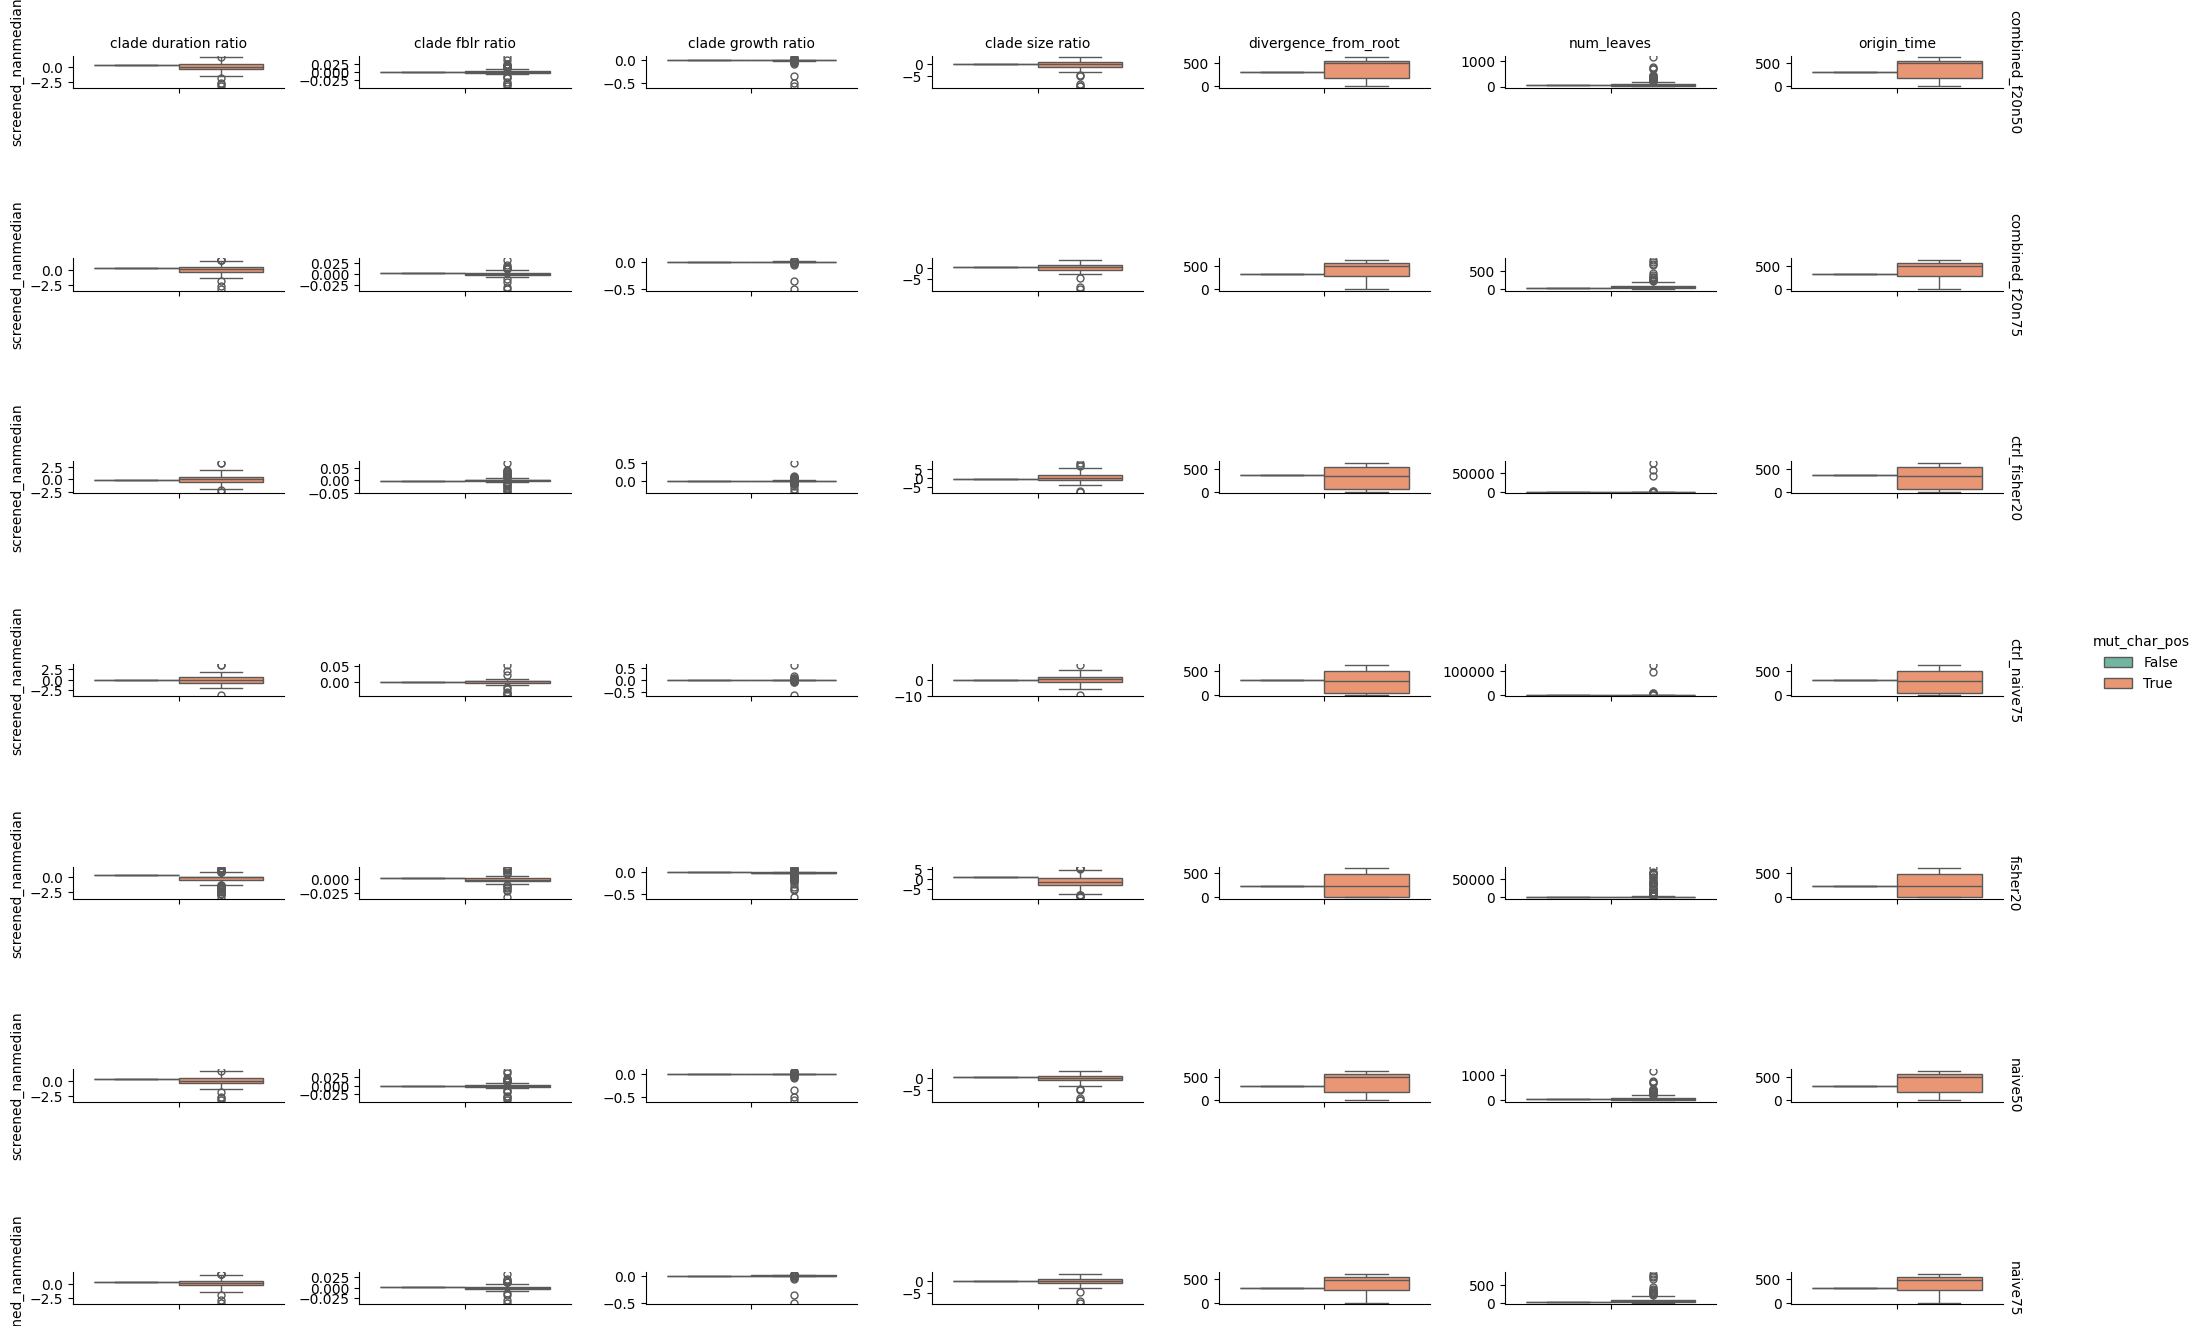

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


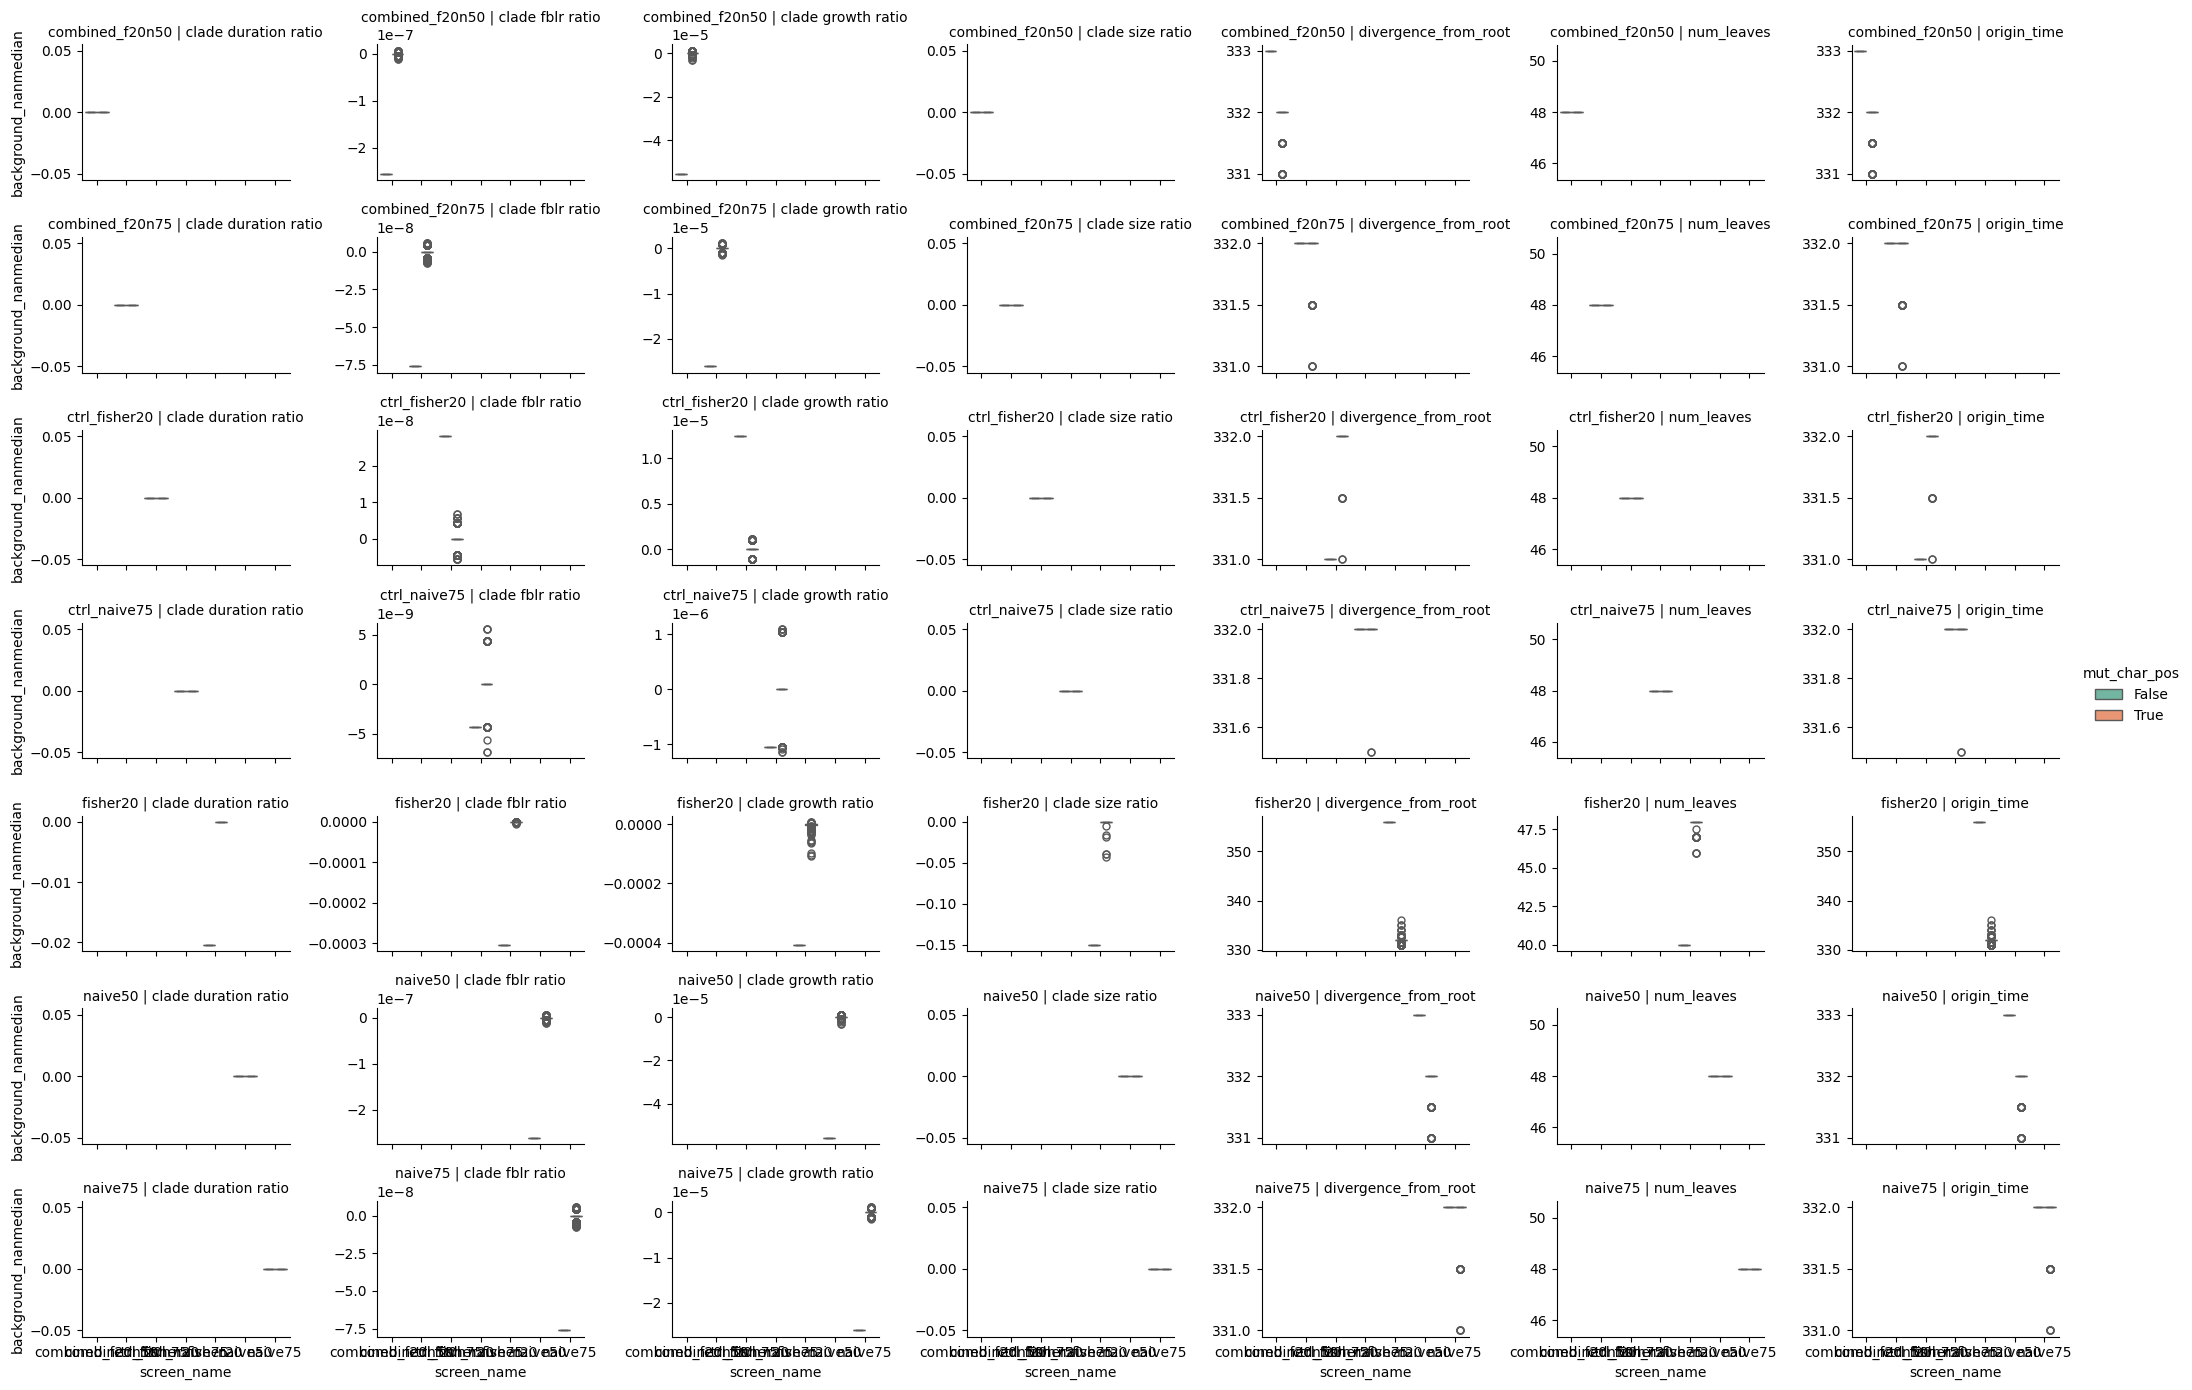

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
